# hw5q2

## (a) Logistic “2” detector
See hw4q2

## (b) Softmax classification: gradient descent (GD)

In [2]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt 

In [3]:
with h5py.File('mnist_traindata.hdf5','r') as f:
    xdata_train=np.array(f['xdata'])
    ydata_train=np.array(f['ydata'])    #one-hot
    #print(ydata_train)
    
with h5py.File('mnist_testdata.hdf5','r') as f:
    xdata_test=np.array(f['xdata'])
    ydata_test=np.array(f['ydata'])


In [4]:
def softmax(z):
    z-=np.max(z,axis=1,keepdims=True)
    return np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)

def negative_likelihood(true_label,new_prob):
    return -np.sum(true_label*np.log(new_prob+1e-9))/true_label.shape[0]

In [5]:
def plt_accuracy_loss(loss_train,loss_test,accuracy_train,accuracy_test,learning_rate):
    plt.figure()
    plt.plot(loss_train,label='loss train')
    plt.plot(loss_test,label='loss test')
    plt.xlabel('Iteration Number')
    plt.ylabel('Log loss')
    plt.title(f'learning rate{learning_rate}:log loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(accuracy_train,label='accuracy train')
    plt.plot(accuracy_test,label='accuracy test')
    plt.xlabel('Iteration Number')
    plt.ylabel('accuracy')
    plt.title(f'learning rate{learning_rate}:Accuracy')
    plt.legend()
    plt.show()

def print_table(iter_stop,accuracy_train,loss_train,accuracy_test,loss_test,learning_rate):
    data={
        'Learning_rate':learning_rate,
        'Iter':iter_stop,
        'Accuracy_train':accuracy_train,
        'Loss_train':loss_train,
        'Accuracy_test':accuracy_test,
        'Loss_test':loss_test,
    }
    df=pd.DataFrame(data)
    print(df)

In [6]:
def gradient_descent(W,b,x_train,x_test,y_train,y_test,learning_rate,max_iter):
    m=x_train.shape[0]
    loss_history_train=[]
    loss_history_test=[]
    accuracy_history_train=[]
    accuracy_history_test=[]
    threshold=1e-3
    pre_loss_train=0
    
    for iter in range(max_iter):
        z_train=np.dot(x_train,W.T)+b.T
        p_train=softmax(z_train)

        #draw initial W b --- loss and accuracy of test
        if iter==0:
            loss_train=negative_likelihood(y_train,p_train)
            loss_history_train.append(loss_train)

            z_test=np.dot(x_test,W.T)+b.T
            p_test=softmax(z_test)
            loss_test=negative_likelihood(y_test,p_test)
            loss_history_test.append(loss_test)
            predictions_test=np.argmax(p_test,axis=1)
            accuracy_test=np.mean(predictions_test==np.argmax(y_test,axis=1))
            accuracy_history_test.append(accuracy_test)

        dw=np.dot(x_train.T,(p_train-y_train))/m
        db=np.sum(p_train-y_train)/m
        W-=learning_rate*dw.T
        b-=learning_rate*db
        
        loss_train=negative_likelihood(y_train,p_train)
        loss_history_train.append(loss_train)
        predictions_train=np.argmax(p_train,axis=1)
        accuracy_train=np.mean(predictions_train==np.argmax(y_train,axis=1))
        accuracy_history_train.append(accuracy_train)

        z_test=np.dot(x_test,W.T)+b.T
        p_test=softmax(z_test)

        loss_test=negative_likelihood(y_test,p_test)
        loss_history_test.append(loss_test)
        predictions_test=np.argmax(p_test,axis=1)
        accuracy_test=np.mean(predictions_test==np.argmax(y_test,axis=1))
        accuracy_history_test.append(accuracy_test)

        #print(loss_train-pre_loss_train)
        if np.abs(loss_train-pre_loss_train)<threshold:
            #print(f"Model converged at iter {iter}")
            break
        pre_loss_train=loss_train
        
    plt_accuracy_loss(loss_history_train,loss_history_test,accuracy_history_train,accuracy_history_test,learning_rate)
    return W,b,loss_train,loss_test,accuracy_train,accuracy_test,iter

In [7]:
def softmax_regression(x_train,x_test,y_train,y_test,max_iter,learning_rates):
    iter_stop=[]
    final_accuracy_train=[]
    final_loss_train=[]
    final_accuracy_test=[]
    final_loss_test=[]
    for learning_rate in learning_rates:
        weights=np.zeros([ydata_train.shape[1],xdata_train.shape[1]])
        bias=np.zeros([ydata_train.shape[1],1])
        weights,bias,loss_train,loss_test,accuracy_train,accuracy_test,iter=gradient_descent(weights,bias,x_train,x_test,y_train,y_test,learning_rate,max_iter)
        iter_stop.append(iter)
        final_accuracy_train.append(accuracy_train)
        final_loss_train.append(loss_test)
        final_accuracy_test.append(accuracy_test)
        final_loss_test.append(loss_train)
    print_table(iter_stop,final_accuracy_train,final_loss_train,final_accuracy_test,final_loss_test,learning_rates)

In [8]:
learning_rates=[0.01,0.1,1,2,3]
max_iter=1000

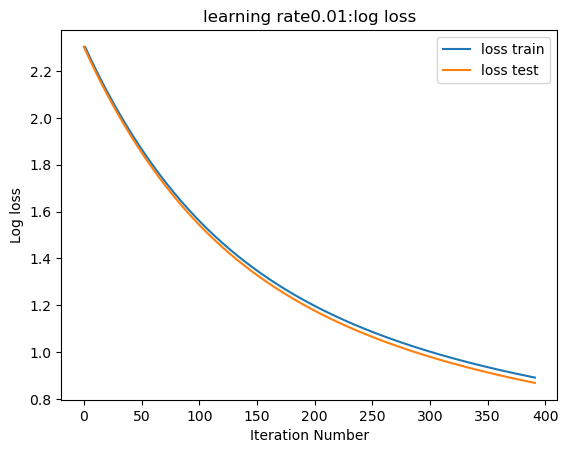

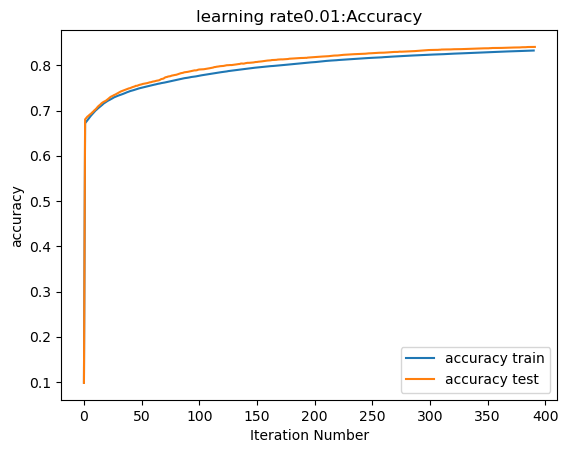

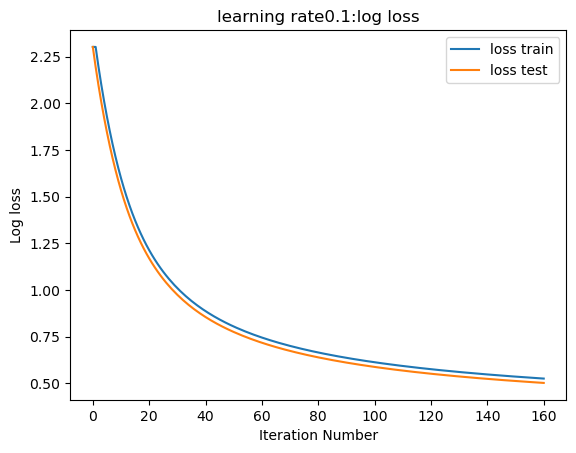

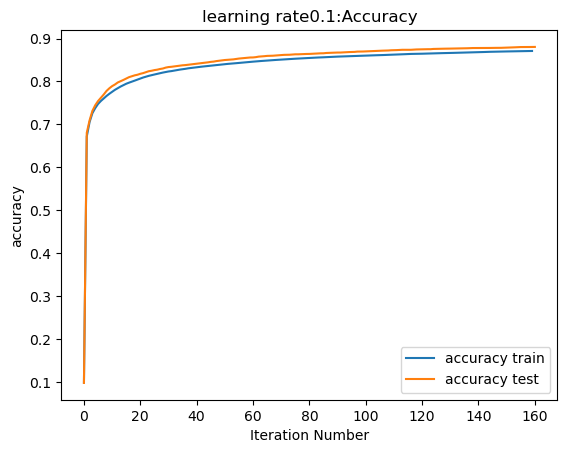

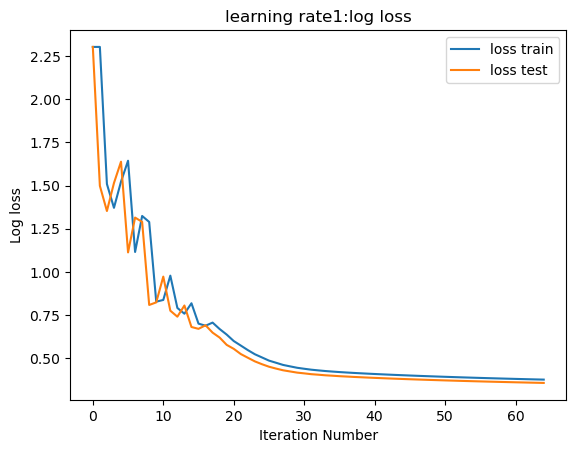

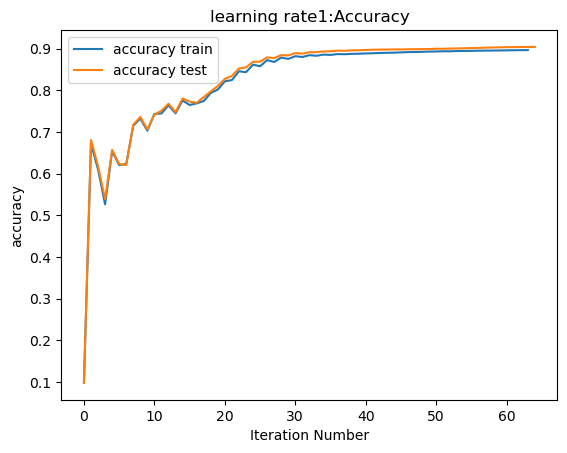

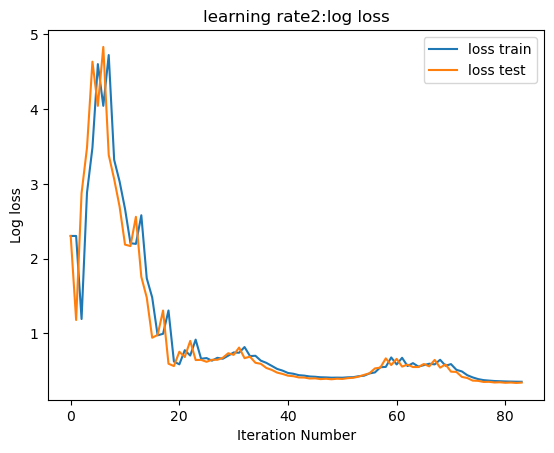

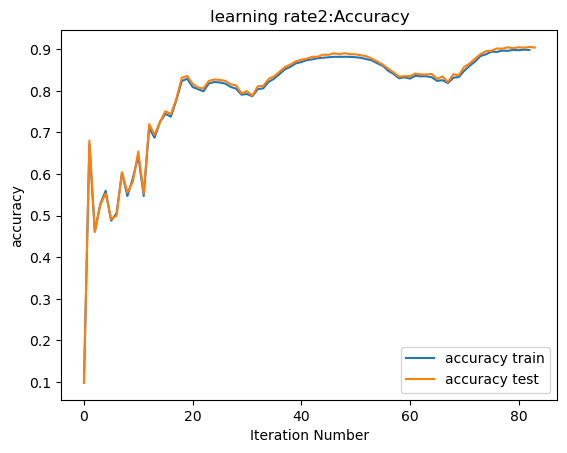

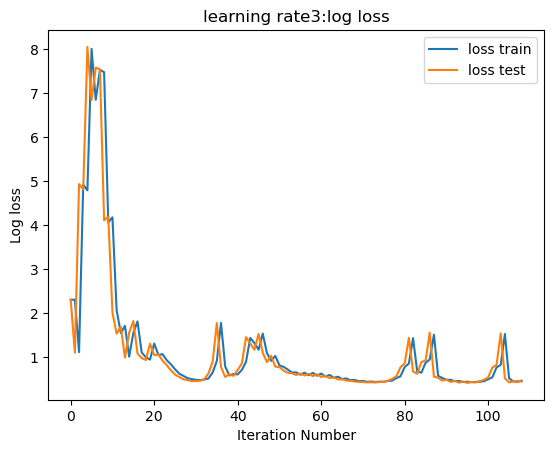

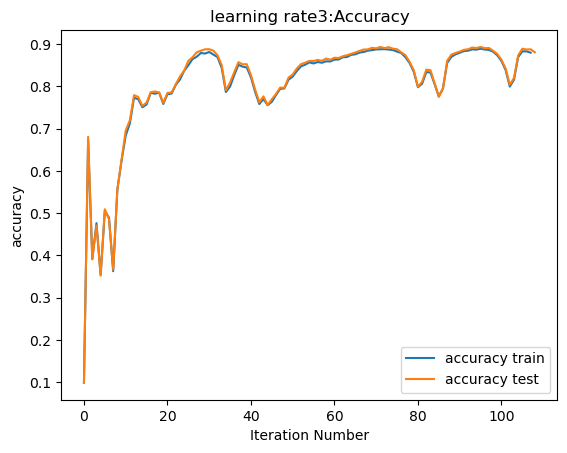

   Learning_rate  Iter  Accuracy_train  Loss_train  Accuracy_test  Loss_test
0           0.01   390        0.832533    0.868458         0.8405   0.891221
1           0.10   159        0.871050    0.502093         0.8805   0.525415
2           1.00    63        0.896317    0.356721         0.9039   0.375899
3           2.00    82        0.898383    0.339433         0.9041   0.350848
4           3.00   107        0.879567    0.470195         0.8805   0.450176


In [9]:
softmax_regression(xdata_train,xdata_test,ydata_train,ydata_test,max_iter,learning_rates)

#### i. Compute (by-hand) the derivative of the log-likelihood of the soft-max function. Write the derivative in terms of conditional probabilities, the vector x, and indicator functions (i.e., do not write this expression in terms of exponentials). You need this gradient in subsequent parts of this problem.
![Example Image](hand.png)
#### ii. Implement batch gradient descent. What learning rate did you use?
I set a list of learning rates (0.01,0.1,1,1.5,2), let the training model running over each of them. And then comparing the final train and test accuracies in a table to see which one performed the best.
#### iii. Plot log-loss (i.e., learning curve) of the training set and test set on the same figure. On a separate figure plot the accuracy against iteration number of your model on the training set and test set. Plot each as a function of the iteration number.
Plots have been given above.
#### iv. Compute the final loss and final accuracy for both your training set and test set.
The data have been given in the table above.

## (c) Softmax classification: stochastic gradient descent

In [14]:
def plt_accuracy_loss_sgd(loss_train,loss_test,accuracy_train,accuracy_test,learning_rate):
    plt.figure()
    plt.plot(loss_train,label='loss train')
    plt.plot(loss_test,label='loss test')
    plt.xlabel('Batch Number')
    plt.ylabel('Log loss')
    plt.title(f'learning rate{learning_rate}:log loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(accuracy_train,label='accuracy train')
    plt.plot(accuracy_test,label='accuracy test')
    plt.xlabel('Batch Number')
    plt.ylabel('accuracy')
    plt.title(f'learning rate{learning_rate}:Accuracy')
    plt.legend()
    plt.show()

In [15]:
def softmax_regression_sgd(x_train,x_test,y_train,y_test,max_iter,batch_size,learning_rate,threshold):
    W=np.zeros([ydata_train.shape[1],xdata_train.shape[1]])
    b=np.zeros([y_train.shape[1],1])

    m=x_train.shape[0]
    loss_history_train=[]
    loss_history_test=[]
    accuracy_history_train=[]
    accuracy_history_test=[]
    pre_loss_train=0

    batch_number=int(np.ceil(m/batch_size))

    for iter in range(max_iter):
        print("iter ",iter,":")

        permutation=np.random.permutation(m)
        x_train_shuffled=x_train[permutation]
        y_train_shuffled=y_train[permutation]

        for i in range(batch_number):
            start_train=i*batch_size
            end_train=min((i+1)*batch_size,m)
            x_train_batch=x_train_shuffled[start_train:end_train]
            y_train_batch=y_train_shuffled[start_train:end_train]

            z_train_batch=np.dot(x_train_batch,W.T)+b.T
            p_train_batch=softmax(z_train_batch)

            dw=np.dot(x_train_batch.T,(p_train_batch-y_train_batch))/len(x_train_batch)
            db=np.sum(p_train_batch-y_train_batch)/len(x_train_batch)
            W-=learning_rate*dw.T
            b-=learning_rate*db

            #5,000 samples
            if i*batch_size%5000==0:
                z_train=np.dot(x_train,W.T)+b.T
                p_train=softmax(z_train)
                loss_train=negative_likelihood(y_train,softmax(np.dot(x_train,W.T)+b.T))
                loss_history_train.append(loss_train)
                accuracy_train=np.mean(np.argmax(p_train,axis=1)==np.argmax(y_train,axis=1))
                accuracy_history_train.append(accuracy_train)

                z_test=np.dot(x_test,W.T)+b.T
                p_test=softmax(z_test)
                loss_test=negative_likelihood(y_test,p_test)
                loss_history_test.append(loss_test)
                accuracy_test=np.mean(np.argmax(p_test,axis=1)==np.argmax(y_test,axis=1))
                accuracy_history_test.append(accuracy_test)
        print("accuracy_train:",accuracy_history_train[-1],", accuracy_test:",accuracy_history_test[-1])
        loss_train=negative_likelihood(y_train,softmax(np.dot(x_train,W.T)+b.T))
        if np.abs(loss_train-pre_loss_train)<threshold:
            #print(f"Model converged at iter {iter}")
            break
        pre_loss_train=loss_train
    plt_accuracy_loss_sgd(loss_history_train,loss_history_test,accuracy_history_train,accuracy_history_test,learning_rate)
    return W,b


#### batch_size=1

iter  0 :
accuracy_train: 0.8808166666666667 , accuracy_test: 0.8816
iter  1 :
accuracy_train: 0.8632833333333333 , accuracy_test: 0.8629
iter  2 :
accuracy_train: 0.8951 , accuracy_test: 0.8917
iter  3 :
accuracy_train: 0.9001833333333333 , accuracy_test: 0.8939
iter  4 :
accuracy_train: 0.8656666666666667 , accuracy_test: 0.8631
iter  5 :
accuracy_train: 0.8946 , accuracy_test: 0.8874
iter  6 :
accuracy_train: 0.89015 , accuracy_test: 0.8907
iter  7 :
accuracy_train: 0.8419833333333333 , accuracy_test: 0.8409
iter  8 :
accuracy_train: 0.8981833333333333 , accuracy_test: 0.8886
iter  9 :
accuracy_train: 0.89615 , accuracy_test: 0.8918
iter  10 :
accuracy_train: 0.9026 , accuracy_test: 0.8964
iter  11 :
accuracy_train: 0.8815333333333333 , accuracy_test: 0.8717
iter  12 :
accuracy_train: 0.8812666666666666 , accuracy_test: 0.8726
iter  13 :
accuracy_train: 0.8882333333333333 , accuracy_test: 0.8831
iter  14 :
accuracy_train: 0.89965 , accuracy_test: 0.8912
iter  15 :
accuracy_train: 0.

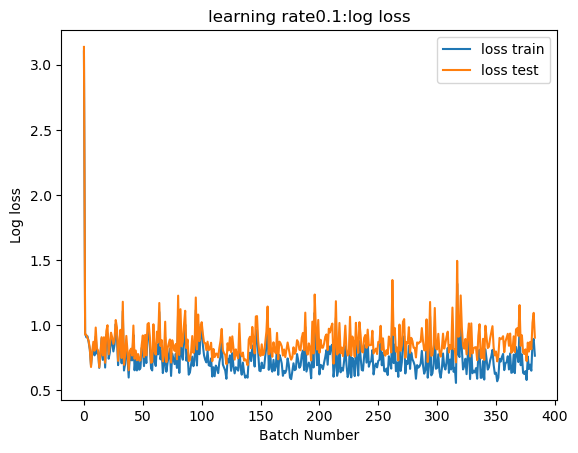

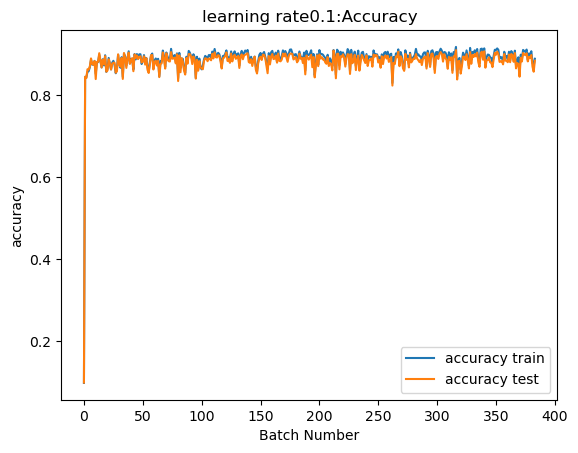

In [21]:
W,B=softmax_regression_sgd(xdata_train,xdata_test,ydata_train,ydata_test,100,1,0.1,1e-3)

#### i. Implement SGD with mini-batch size of 1 (i.e., compute the gradient and update weight safter each sample). Record the log-loss and accuracy of the training set and test set every 5,000 samples. Plot the sampled log-loss and accuracy values on the same (respective) figures against the batch number. Your plots should start at iteration 0 (i.e., include initial log-loss and accuracy). Your curves should show performance comparable to batch gradient descent. How many iterations did it take to acheive comparable performance with batch gradient descent? How does this number depend on the learning rate? (or learning rate decay schedule if you have a non-constant learning rate).
- Plots and data have been given above 
- For SGD mini-batch with batchsize of 1, similar to batch-gd, it took 31 iterations to reach comparable performance with batch gradient descent.
- I tried different learning rates. I found that higher learning rates converged faster, but the accuracy struggled to converge and oscillated in the 88-90% range constantly. When the learning rate is smaller, the steps taken during optimization are also smaller, making it less likely to miss the optimal solution and resulting in a smoother convergence.
#### ii. Compare (to batch gradient descent) the total computational complexity to reach a comparable accuracy on your training set. Note that each iteration of batch gradient descent costs an extra factor of N operations where N is the number data points.
In batch gradient descent, the computational complexity can be seen as O(E*F*N), where N is the number of data points,F is the number of features and E is the number of epochs.
However, The computational complexity of SGD with mini-batch batch size=1 is O(E*B*D)where B is the batch size.And because the batch size B<=N, the computational complexity can often be rewritten as O(E*D).
This can be observed in the training where for gradient descent where we required appro*18000 iterations to converge,whereas for SGD we required 600000 batches.
However there are 60000 datapoints in the dataset, so gradient descent in fact took 18000*60000=1080000000 computational units compared to only 600000 computational units for SGD
This shows that that SGD performs much better than batch gradient descent in terms of computational complexity.

#### batch_size=100

iter  0 :
accuracy_train: 0.9057 , accuracy_test: 0.909
iter  1 :
accuracy_train: 0.9113666666666667 , accuracy_test: 0.9105
iter  2 :
accuracy_train: 0.91185 , accuracy_test: 0.912
iter  3 :
accuracy_train: 0.9146166666666666 , accuracy_test: 0.9133
iter  4 :
accuracy_train: 0.91555 , accuracy_test: 0.9125
iter  5 :
accuracy_train: 0.92385 , accuracy_test: 0.9208
iter  6 :
accuracy_train: 0.9192166666666667 , accuracy_test: 0.9151
iter  7 :
accuracy_train: 0.9259666666666667 , accuracy_test: 0.9201
iter  8 :
accuracy_train: 0.9236166666666666 , accuracy_test: 0.9193
iter  9 :
accuracy_train: 0.9238 , accuracy_test: 0.92
iter  10 :
accuracy_train: 0.9242333333333334 , accuracy_test: 0.9188
iter  11 :
accuracy_train: 0.91555 , accuracy_test: 0.906
iter  12 :
accuracy_train: 0.9295666666666667 , accuracy_test: 0.9207
iter  13 :
accuracy_train: 0.9208666666666666 , accuracy_test: 0.9125
iter  14 :
accuracy_train: 0.9243333333333333 , accuracy_test: 0.917
iter  15 :
accuracy_train: 0.92778

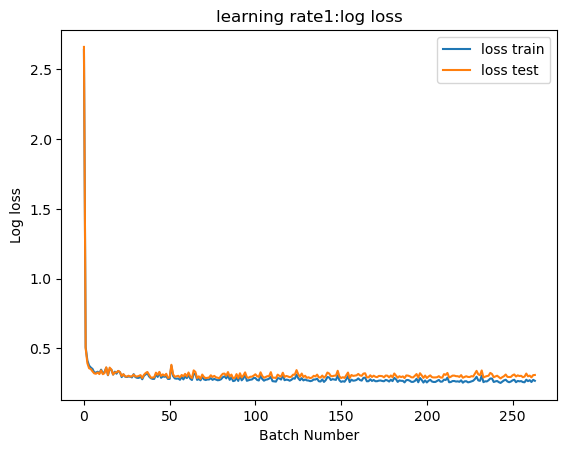

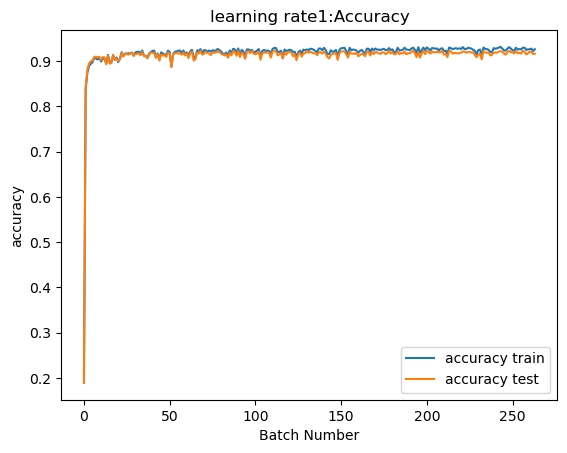

In [17]:
W,B=softmax_regression_sgd(xdata_train,xdata_test,ydata_train,ydata_test,25,100,1,1e-3)

#### iii. Implement SGD with mini-batch size of 100 (i.e., compute the gradient and update weights with accumulated average after every 100 samples). Record the log-loss and accuracies as above (every 5,000 samples – not 5,000 batches) and create similar plots. Your curves should show performance comparable to batch gradient descent. How many iterations did it take to acheive comparable performance with batch gradient descent? How does this number depend on the learning rate? (or learning rate decay schedule if you have a non-constant learning rate).
- Plots and data have been given above.
- For SGD mini-batch with batchsize of 100, it took 21 iterations to reach comparable performance with batch gradient descent.
- In this model, I also tried differrent learning rates. The situations are same as battchsize=1. That higher learning rates converged faster, but the accuracy struggled to converge and oscillated. The smaller learning rates lead to smaller steps, making it less likely to miss the optimal solution and resulting in a smoother convergence.
#### iv. Compare the computational complexity to reach comparable perforamnce between the 100 sample mini-batch algorithm, the single-point mini-batch, and batch gradient descent.
The computational complexity of SGD with mini-batch batch size=100 is O(E*B*D), where B is the batch size =100.Andbecause the batch size B<=N, the computational complexity can often be rewritten as O(100*E*D).
This can be observed in the training where for gradient descent where we required appro*18000 iterations to converge,whereas for SGD we required 600,000/100=60000 batches.
However there are 60000 datapoints in the dataset, so gradient descent in fact took 18000*60000=1080000000 computational units compared to only 60000 computational units for SGD
This shows that that SGD performs much better than batch gradient descent in terms of computational complexity.

In [20]:
outFile='hw5q2_wb.hd5'
assert W.shape[0]==10, 'Error: the length is incorrect'
assert W.shape[1]==784, 'Error: the length is incorrect'
assert B.shape[0]==10, 'Error: the length is incorrect'
assert B.shape[1]==1, 'Error: the length is incorrect'

with h5py.File(outFile, 'w') as hf:
    hf.create_dataset('w', data = np.asarray(W))
    hf.create_dataset('b', data = np.asarray(B))

with h5py.File(outFile,'r') as hf:
    w_copy=hf['w'][:]

np.testing.assert_array_equal(W,w_copy)